In [31]:
# libraries
import yfinance as yf # for stock data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns
from datetime import datetime

In [32]:
# Prompt user to enter the stock ticker
ticker = input("Enter the stock ticker (e.g., AAPL for Apple) or press Enter to use default (AAPL): ")

# Set default ticker if input is blank
if not ticker:
    ticker = 'AAPL'

print(f"Selected ticker: {ticker}")

Selected ticker: AAPL


In [33]:


# Example usage: Get the exchange for Apple (AAPL)
ticker_symbol = 'AAPL'


# Print the result



In [34]:
# Fetch ticker information
ticker_info = yf.Ticker(ticker).info

# function to get min and max trading dates
def get_trading_dates(ticker_symbol):
    # Fetch the stock data using yfinance
    stock = yf.Ticker(ticker_symbol)
    
    # Get the historical data
    hist = stock.history(period="max")
    
    # Check if the historical data is available
    if hist.empty:
        return {'start_date': 'N/A', 'end_date': 'N/A'}
    
    # Get the start and end dates of trading
    min_date = hist.index.min().strftime('%Y-%m-%d')
    max_date = hist.index.max().strftime('%Y-%m-%d')
    
    return {'min_date': min_date, 'max_date': max_date}

# Check if 'firstTradeDateEpoch' key exists in ticker_info
dates = get_trading_dates(ticker)

# Function to fetch the exchange for a given stock ticker
def get_stock_exchange(ticker_symbol):
    # Fetch the stock data using yfinance
    stock = yf.Ticker(ticker_symbol)
    
    # Get the stock's information
    ticker_info = stock.info
    
    # Extract the exchange information
    exchange = ticker_info.get('exchange', 'N/A')

    if exchange == 'NMS':
        exchange = 'NMS (NASDAQ)'  # Replace NMS with NASDAQ for clarity
    
    return exchange

exchange = get_stock_exchange(ticker)

# Display the results
print(f"Ticker: {ticker}")
print(f"Name of stock: {ticker_info.get('longName', 'N/A')}")
print(f"Start date of trading: {dates['min_date']}")
print(f"Last date of trading: {dates['max_date']}")
print(f"Exchange for {ticker_symbol}: {exchange}")

Ticker: AAPL
Name of stock: Apple Inc.
Start date of trading: 1980-12-12
Last date of trading: 2025-01-03
Exchange for AAPL: NMS (NASDAQ)


In [35]:
# Prompt user to enter the start and end dates
start_date = input(f"Enter the start date (YYYY-MM-DD) or press Enter to use default ({dates['min_date']}): ")
end_date = input(f"Enter the end date (YYYY-MM-DD) or press Enter to use default ({dates['max_date']}): ")

# Set default dates if input is blank
if not start_date:
    start_date = dates['min_date']
if not end_date:
    end_date = dates['max_date']

# Convert the input strings to datetime objects
start = datetime.strptime(start_date, '%Y-%m-%d')
end = datetime.strptime(end_date, '%Y-%m-%d')

# Check if the dates are within the allowed range
if start < datetime.strptime(dates['min_date'], '%Y-%m-%d'):
    start = datetime.strptime(dates['min_date'], '%Y-%m-%d')
if end > datetime.strptime(dates['max_date'], '%Y-%m-%d'):
    end = datetime.strptime(dates['max_date'], '%Y-%m-%d')

In [36]:
# Display the data that will be used to fetch from Yahoo Finance
print(f"Ticker: {ticker}")
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

# Prompt user for confirmation
confirmation = input("Do you want to proceed with fetching the data from Yahoo Finance? (yes/no): ")

# Check user response
if confirmation.lower() in ['yes', '']:
    # Fetch the data
    data = yf.download(ticker, start=start, end=end)
    print("Data fetched successfully.")
else:
    print("Fetching data aborted by user.")

Ticker: AAPL
Start date: 1980-12-12
End date: 2025-01-03


[*********************100%***********************]  1 of 1 completed

Data fetched successfully.


In [37]:
def calculate_expected_rows(start, end, holidays=None):
    # Generate a date range from start to end, using business days (weekdays only)
    date_range = pd.date_range(start=start, end=end, freq='B')  # 'B' means business days
    
    # If holidays are provided, exclude them from the date range
    if holidays:
        holidays = pd.to_datetime(holidays)  # Convert holidays to datetime if they're in string format
        date_range = date_range[~date_range.isin(holidays)]  # Remove holidays from the date range

    # The expected number of trading days is the length of the date range
    expected_rows = len(date_range)
    return expected_rows


def validate_stock_data(ticker_symbol, start, end):
    # Fetch the stock data using yfinance
    stock = yf.Ticker(ticker_symbol)
    
    # Get the historical data
    data = stock.history(period="max")
    
    # Check if data was fetched successfully
    if data.empty:
        print("No data fetched for", ticker_symbol)
        return
    
    # 1. Check the number of rows (e.g., expect more than 100 rows)
    expected_rows = calculate_expected_rows(start, end)  # Example: you can modify this depending on the stock's history (hard to calculate exact number)
    actual_rows = len(data) 
    print(f"Expected Rows: {expected_rows}, Actual Rows: {actual_rows}")
    
    # 2. Check the number of columns (e.g., expected columns are ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'])
    expected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
    actual_columns = data.columns.tolist()
    print(f"Expected Columns: {expected_columns}")
    print(f"Actual Columns: {actual_columns}")
    
    # 3. Check for missing (NaN) values
    missing_values = data.isnull().sum().sum()
    print(f"Missing Values: {missing_values}")
    
    # 4. Check for any negative prices (Open, High, Low, Close should not be negative)
    if (data[['Open', 'High', 'Low', 'Close']] < 0).any().any():
        print("Error: Negative prices found!")
    else:
        print("No negative prices found.")
    
    # 5. Check maximum and minimum prices
    max_price = data['Close'].max()
    min_price = data['Close'].min()
    print(f"Max Price: {max_price}, Min Price: {min_price}")
    
    # If everything is okay, print a success message
    if missing_values == 0 and not (data[['Open', 'High', 'Low', 'Close']] < 0).any().any():
        print("Data validation passed successfully!")

# Example usage: Validate the stock data for Apple (AAPL)
validate_stock_data(ticker, start, end)

Expected Rows: 11496, Actual Rows: 11107
Expected Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
Actual Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
Missing Values: 0
No negative prices found.
Max Price: 259.0199890136719, Min Price: 0.037814874202013016
Data validation passed successfully!


In [38]:
# Display the first 10 rows of the data with formatting
data.head(10).style.format("{:.2f}")

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12 00:00:00,0.10,0.10,0.10,0.10,469033600.00
1980-12-15 00:00:00,0.09,0.09,0.09,0.09,175884800.00
1980-12-16 00:00:00,0.09,0.09,0.09,0.09,105728000.00
1980-12-17 00:00:00,0.09,0.09,0.09,0.09,86441600.00
1980-12-18 00:00:00,0.09,0.09,0.09,0.09,73449600.00
1980-12-19 00:00:00,0.10,0.10,0.10,0.10,48630400.00
1980-12-22 00:00:00,0.10,0.10,0.10,0.10,37363200.00
1980-12-23 00:00:00,0.11,0.11,0.11,0.11,46950400.00


In [39]:
# Save the data to a CSV file
data.to_csv('stock_data.csv', index=True)

print("Data saved to stock_data.csv successfully.")

Data saved to stock_data.csv successfully.


In [40]:
# Display the first 10 rows of the data with formatting
data.head(10).style.format("{:.2f}")

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12 00:00:00,0.10,0.10,0.10,0.10,469033600.00
1980-12-15 00:00:00,0.09,0.09,0.09,0.09,175884800.00
1980-12-16 00:00:00,0.09,0.09,0.09,0.09,105728000.00
1980-12-17 00:00:00,0.09,0.09,0.09,0.09,86441600.00
1980-12-18 00:00:00,0.09,0.09,0.09,0.09,73449600.00
1980-12-19 00:00:00,0.10,0.10,0.10,0.10,48630400.00
1980-12-22 00:00:00,0.10,0.10,0.10,0.10,37363200.00
1980-12-23 00:00:00,0.11,0.11,0.11,0.11,46950400.00


In [41]:
# Define the correct column names
column_names = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Path to the CSV file (ensure file exists)
file_path = './stock_data.csv'

# Load the CSV file starting from the second row and with the appropriate column names
df = pd.read_csv(file_path, skiprows=2, names=column_names, skip_blank_lines=True)

# Convert 'Date' to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["Date"])

# Save the cleaned data in the same folder
output_file_path = './cleaned_stock_data.csv'
df.to_csv(output_file_path, index=False)

print(f"Cleaned data for {ticker} saved to '{output_file_path}'")

Cleaned data for AAPL saved to './cleaned_stock_data.csv'


C:\Users\idamn\AppData\Local\Temp\ipykernel_12408\617178534.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [42]:
# Load the cleaned stock data file into a DataFrame
cleaned_data = pd.read_csv(output_file_path)

# Display the first few rows of the cleaned data
cleaned_data.head()

# export dataframe to html
cleaned_data.to_html('cleaned_data.html')

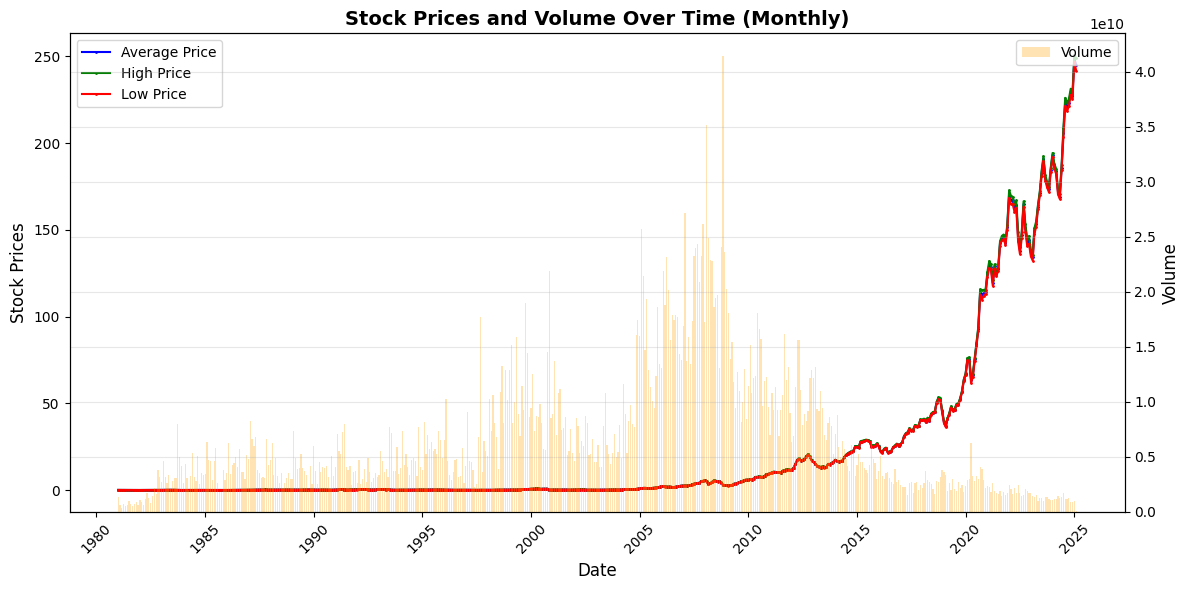

In [43]:
# Group data by month
df_monthly = df.resample('M', on='Date').agg({
    'Close': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Open': 'mean',
    'Volume': 'sum'
}).reset_index()

# Calculate the Average Price as the mean of High, Low, and Close prices
df_monthly['Average Price'] = df_monthly[['High', 'Low', 'Close']].mean(axis=1)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Scatter plot for stock prices
ax1.plot(df_monthly['Date'], df_monthly['Average Price'], marker='o', markersize=1, label='Average Price', color='blue')  # Dashed line for average price
ax1.plot(df_monthly['Date'], df_monthly['High'], marker='o', markersize=1, label='High Price', color='g')
ax1.plot(df_monthly['Date'], df_monthly['Low'], marker='o', markersize=1, label='Low Price', color='r')
ax1.set_ylabel('Stock Prices', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# Bar graph for Volume
ax2 = ax1.twinx()
ax2.bar(df_monthly['Date'], df_monthly['Volume'], width=20, alpha=0.3, color='orange', label='Volume')
ax2.set_ylabel('Volume', fontsize=12)
ax2.legend(loc='upper right')

# Add title and grid
plt.title('Stock Prices and Volume Over Time (Monthly)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Export graph
plt.savefig('monthly_stock_prices_volume.png')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
cleaned_data_with_metrics = cleaned_data.copy()

cleaned_data_with_metrics.head()

,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600.0
1,1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800.0
2,1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000.0
3,1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600.0
4,1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600.0


In [45]:
# Add and calcualet columns for metrics

# Daily Metrics
cleaned_data_with_metrics['Price Range'] = cleaned_data_with_metrics['High'] - cleaned_data_with_metrics['Low']
cleaned_data_with_metrics['Daily % Change'] = ((cleaned_data_with_metrics['Close'] - cleaned_data_with_metrics['Open']) / cleaned_data_with_metrics['Open']) * 100
cleaned_data_with_metrics['Price Movement'] = cleaned_data_with_metrics['Close'] - cleaned_data_with_metrics['Open']
cleaned_data_with_metrics['Volatility %'] = ((cleaned_data_with_metrics['High'] - cleaned_data_with_metrics['Low']) / cleaned_data_with_metrics['Open']) * 100

# Overnight Metrics
cleaned_data_with_metrics['Overnight Return'] = ((cleaned_data_with_metrics['Open'] - cleaned_data_with_metrics['Close'].shift(1)) / cleaned_data_with_metrics['Close'].shift(1)) * 100

# Rolling Window Metrics
cleaned_data_with_metrics['7-Day SMA'] = cleaned_data_with_metrics['Close'].rolling(window=7).mean()
cleaned_data_with_metrics['30-Day SMA'] = cleaned_data_with_metrics['Close'].rolling(window=30).mean()
cleaned_data_with_metrics['7-Day EMA'] = cleaned_data_with_metrics['Close'].ewm(span=7, adjust=False).mean()
cleaned_data_with_metrics['Momentum (7 Days)'] = cleaned_data_with_metrics['Close'] - cleaned_data_with_metrics['Close'].shift(7)
cleaned_data_with_metrics['Momentum (30 Days)'] = cleaned_data_with_metrics['Close'] - cleaned_data_with_metrics['Close'].shift(30)

# Cumulative Metrics
cleaned_data_with_metrics['Cumulative Return'] = ((cleaned_data_with_metrics['Close'] - cleaned_data_with_metrics['Close'].iloc[0]) / cleaned_data_with_metrics['Close'].iloc[0]) * 100
cleaned_data_with_metrics['Normalized Close'] = (cleaned_data_with_metrics['Close'] - cleaned_data_with_metrics['Close'].min()) / (cleaned_data_with_metrics['Close'].max() - cleaned_data_with_metrics['Close'].min())
cleaned_data_with_metrics['Normalized Volume'] = cleaned_data_with_metrics['Volume'] / cleaned_data_with_metrics['Volume'].max()

# 30-day Volatility
cleaned_data_with_metrics['30-Day Price Volatility'] = cleaned_data_with_metrics['Close'].rolling(window=30).std()

# Previous Data Differences
cleaned_data_with_metrics['Daily Return'] = cleaned_data_with_metrics['Close'].pct_change() * 100
cleaned_data_with_metrics['Volume Change'] = cleaned_data_with_metrics['Volume'].diff()
    
# Volume Metrics
cleaned_data_with_metrics['Volume % of Total'] = cleaned_data_with_metrics['Volume'] / cleaned_data_with_metrics['Volume'].sum()


In [46]:
cleaned_data_with_metrics.head()

# export dataframe to html
cleaned_data_with_metrics.to_html('cleaned_data_with_metrics.html', index=False)

In [47]:
# Save the updated data with the new metrics back to a new CSV
output_file = './cleaned_stock_data_with_metrics.csv'
cleaned_data_with_metrics.head().to_csv(output_file, index=False)

print(f"Cleaned stock data with metrics added to '{output_file}'")

Cleaned stock data with metrics added to './cleaned_stock_data_with_metrics.csv'


In [48]:
# Get a list of all columns to drop
columns_to_keep = ['Date', 'High', 'Low', 'Open', 'Daily Return']
columns_to_drop = [col for col in cleaned_data_with_metrics.columns if col not in columns_to_keep]

# Drop unwanted columns
cleaned_data_with_metrics = cleaned_data_with_metrics.drop(columns=columns_to_drop)

# Calculate 30-day rolling volatility
cleaned_data_with_metrics['30-Day Volatility'] = (
    cleaned_data_with_metrics['Daily Return']
    .rolling(window=30)  # Rolling window of 30 days
    .std()  # Calculate standard deviation
)

# Display the resulting DataFrame
# Display the shape of the resulting DataFrame
print(cleaned_data_with_metrics.shape)

# Display the first rows of the data
print(cleaned_data_with_metrics.head())


(11106, 6)
         Date      High       Low      Open  Daily Return  30-Day Volatility
0  1980-12-12  0.099264  0.098834  0.098834           NaN                NaN
1  1980-12-15  0.094108  0.093678  0.094108     -5.217085                NaN
2  1980-12-16  0.087232  0.086802  0.087232     -7.339805                NaN
3  1980-12-17  0.089381  0.088951  0.088951      2.475095                NaN
4  1980-12-18  0.091959  0.091530  0.091530      2.899274                NaN


In [49]:
# Step 1: Drop the first 30 days
cleaned_data_with_metrics_for_sampling = cleaned_data_with_metrics.iloc[30:].reset_index(drop=True)

# Display the resulting DataFrame
# Display the shape of the resulting DataFrame
print(cleaned_data_with_metrics_for_sampling.shape)

# Display the first rows of the data
print(cleaned_data_with_metrics_for_sampling.head())

#export dataframe to html
cleaned_data_with_metrics_for_sampling.to_html('cleaned_data_with_metrics_for_sampling.html')


(11076, 6)
         Date      High       Low      Open  Daily Return  30-Day Volatility
0  1981-01-27  0.110866  0.110007  0.110866     -0.775162           3.925231
1  1981-01-28  0.106999  0.106570  0.106999     -3.124748           3.839047
2  1981-01-29  0.103132  0.102702  0.103132     -3.628802           3.631882
3  1981-01-30  0.097975  0.097116  0.097975     -5.439701           3.777405
4  1981-02-02  0.091959  0.091530  0.091959     -5.751852           3.905019


In [50]:
#Cochran’s Formula for Sample Size Calculation

def calculate_sample_size(N, p=0.5, e=0.05, Z=1.96):
    # Cochran's formula
    n0 = (Z**2 * p * (1 - p)) / (e**2)
    # Adjust for finite population
    n = n0 / (1 + (n0 - 1) / N)
    return ceil(n)

# Example: Population size = 11076
population_size = 11076
sample_size = calculate_sample_size(population_size)
print(f"Recommended sample size: {sample_size}")


Recommended sample size: 372


In [51]:
# Parameters for sampling
n = sample_size  # Number of samples
weight_column = '30-Day Volatility'  # Column to use for unequal sampling

# Ensure the weight column is normalized for unequal probability sampling
cleaned_data_with_metrics['Sampling Weight'] = (
    cleaned_data_with_metrics[weight_column] / cleaned_data_with_metrics[weight_column].sum()
)

# Equal Probability Sampling
equal_probability_sample = cleaned_data_with_metrics.sample(
    n=n, 
    random_state=42,  # Ensures reproducibility
    replace=False  # No replacement
)

# Unequal Probability Sampling
unequal_probability_sample = cleaned_data_with_metrics.sample(
    n=n, 
    weights='Sampling Weight',  # Use the normalized weights
    random_state=42,  # Ensures reproducibility
    replace=False  # No replacement
)


In [52]:
# Drop 'Sampling Weight' column from equal probability sample
equal_probability_sample = equal_probability_sample.drop(columns=['Sampling Weight'])

# Export equal probability sample to HTML
equal_probability_sample.to_html('equal_probability_sample.html', index=False)

# Export unequal probability sample to HTML
unequal_probability_sample.to_html('unequal_probability_sample.html', index=False)

# Add titles to the HTML files
with open('equal_probability_sample.html', 'r') as file:
    equal_html = file.read()

with open('unequal_probability_sample.html', 'r') as file:
    unequal_html = file.read()

equal_html = '<h1>Equal Probability Sample</h1>' + equal_html
unequal_html = '<h1>Unequal Probability Sample</h1>' + unequal_html

with open('equal_probability_sample.html', 'w') as file:
    file.write(equal_html)

with open('unequal_probability_sample.html', 'w') as file:
    file.write(unequal_html)

print("Samples exported to HTML with titles added.")

Samples exported to HTML with titles added.


In [53]:
def summarize_sampling_methods(equal_sample, unequal_sample, original_data):
    """
    Create a tabular summary comparing Equal and Unequal Probability Sampling.
    """
    
    # Calculate sample sizes
    original_sample_size = original_data.shape[0]
    equal_sample_size = equal_sample.shape[0]
    unequal_sample_size = unequal_sample.shape[0]

    # Calculate averages for metrics
    original_averages = original_data['30-Day Volatility'].mean()
    equal_averages = equal_sample['30-Day Volatility'].mean()
    unequal_averages = unequal_sample['30-Day Volatility'].mean()
    
    # Create the main summary table for metrics
    summary_table = pd.DataFrame({
        "Metric": ["Number of Samples", "30-Day Volatility"],
        "Original Data (Avg)": [original_sample_size, original_averages],
        "Equal Sample (Avg)": [equal_sample_size, equal_averages],
        "Unequal Sample (Avg)": [unequal_sample_size, unequal_averages]
    })
    
    return summary_table


# Generate the summary table
summary_table = summarize_sampling_methods(equal_probability_sample, unequal_probability_sample, cleaned_data_with_metrics_for_sampling)

# Print the summary in an organized format
print("\nSummary of Sampling Methods:")
print(f"Equal Sample Size: {equal_probability_sample.shape[0]}")
print(f"Unequal Sample Size: {unequal_probability_sample.shape[0]}")
print("\nComparison Table:")
print(summary_table.to_string(index=False))

# Optionally, save the summary table to a file
# summary_table.to_csv("sampling_summary.csv", index=False)

# export dataframe to html
cleaned_data_with_metrics_for_sampling.to_html('cleaned_data_with_metrics_for_sampling.html')

# export summary_table dataframe to html
summary_table.to_html('summary_table.html')


Summary of Sampling Methods:
Equal Sample Size: 372
Unequal Sample Size: 372

Comparison Table:
           Metric  Original Data (Avg)  Equal Sample (Avg)  Unequal Sample (Avg)
Number of Samples         11076.000000          372.000000            372.000000
30-Day Volatility             2.507732            2.489204              3.072986


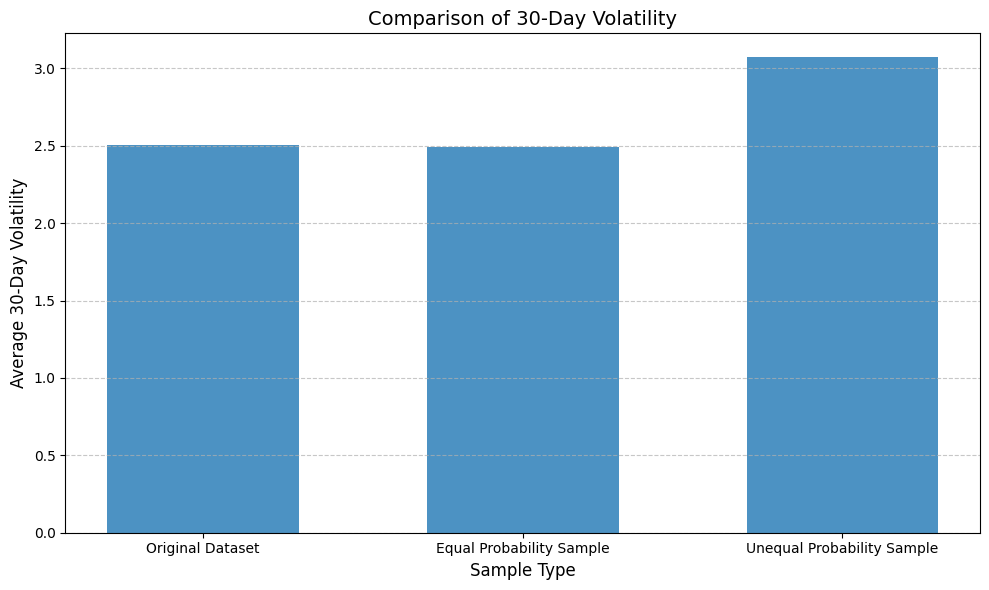

In [54]:
# Calculate the average volatility for each dataset
original_volatility_mean = cleaned_data_with_metrics['30-Day Volatility'].mean()
random_sample_volatility_mean = equal_probability_sample['30-Day Volatility'].mean()
unequal_sample_volatility_mean = unequal_probability_sample['30-Day Volatility'].mean()

# Prepare data for the diagram
categories = ['Original Dataset', 'Equal Probability Sample', 'Unequal Probability Sample']
means = [original_volatility_mean, random_sample_volatility_mean, unequal_sample_volatility_mean]

# Create a bar chart to compare the volatility means
plt.figure(figsize=(10, 6))
plt.bar(categories, means, alpha=0.8, width=0.6)
plt.title('Comparison of 30-Day Volatility', fontsize=14)
plt.ylabel('Average 30-Day Volatility', fontsize=12)
plt.xlabel('Sample Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('volatility_comparison_plot.png', dpi=300, bbox_inches='tight')

plt.show()


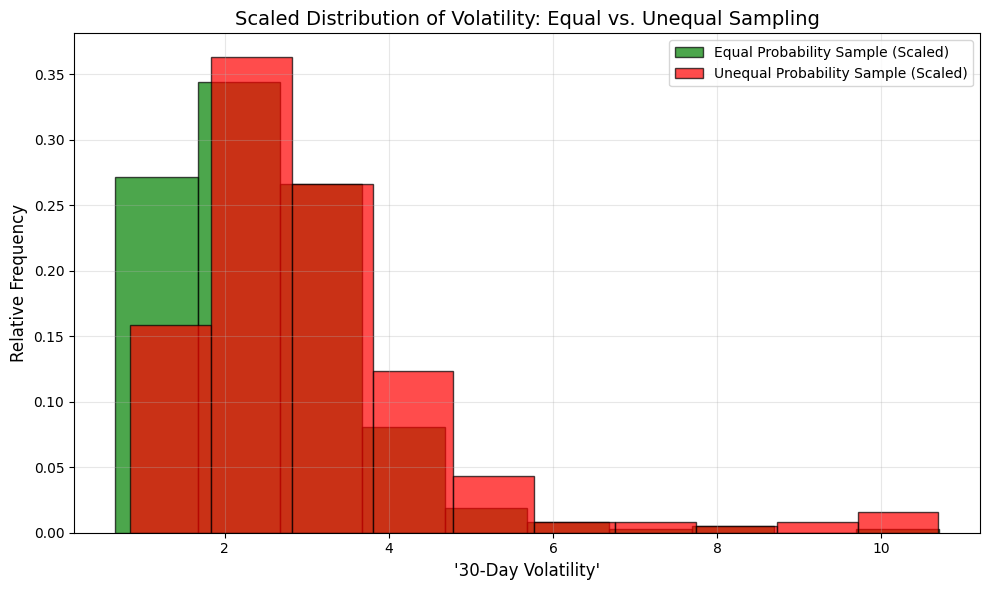

In [55]:
# Create histograms to show the distribution of volatility for both sampling methods
plt.figure(figsize=(10, 6))

# Histogram for random sampling (equal probability) - normalized
plt.hist(
    equal_probability_sample['30-Day Volatility'],
    bins=10,  # Number of bins for grouping data
    alpha=0.7,
    label='Equal Probability Sample (Scaled)',
    color='green',
    edgecolor='black',
    weights=[1 / len(equal_probability_sample)] * len(equal_probability_sample)  # Normalize
)

# Histogram for unequal sampling (based on Volatility %) - normalized
plt.hist(
    unequal_probability_sample['30-Day Volatility'],
    bins=10,  # Number of bins for consistency
    alpha=0.7,
    label='Unequal Probability Sample (Scaled)',
    color='red',
    edgecolor='black',
    weights=[1 / len(unequal_probability_sample)] * len(unequal_probability_sample)  # Normalize
)

# Add title and labels
plt.title("Scaled Distribution of Volatility: Equal vs. Unequal Sampling", fontsize=14)
plt.xlabel("'30-Day Volatility'", fontsize=12)
plt.ylabel("Relative Frequency", fontsize=12)  # Reflects normalization
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig('scaled_volatility_comparison_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [56]:
def calculate_volatility_comparison(ns, original_data):
    """
    Create a table to calculate and compare volatility for different sample sizes and both probabilities.
    """
    results = []

    for n in ns:
        # Equal probability sampling
        equal_sample = original_data.sample(n=n, random_state=42, replace=False)
        equal_mean = equal_sample['30-Day Volatility'].mean()

        # Unequal probability sampling
        original_data['Sampling Weight'] = original_data['30-Day Volatility'] / original_data['30-Day Volatility'].sum()
        unequal_sample = original_data.sample(n=n, weights='Sampling Weight', random_state=42, replace=False)
        unequal_mean = unequal_sample['30-Day Volatility'].mean()

        # Append results
        results.append({
            'Sample Size (n)': n,
            'Equal Mean Volatility': equal_mean,
            'Unequal Mean Volatility': unequal_mean
        })

    # Convert to DataFrame
    comparison_table = pd.DataFrame(results)
    return comparison_table

# Example usage
n_values = [0, 50, 100, sample_size, 500, 1000, 5000, 10000, cleaned_data_with_metrics_for_sampling['30-Day Volatility'].count()]
comparison_table = calculate_volatility_comparison(n_values, cleaned_data_with_metrics)

# Print the comparison table
print("\nVolatility Comparison Table:")
print(comparison_table.to_string(index=False))
print("\nOriginal Data Volatility Mean:", original_volatility_mean)

# Export dataframe to html
comparison_table.to_html('comparison_table.html')


Volatility Comparison Table:
 Sample Size (n)  Equal Mean Volatility  Unequal Mean Volatility
               0                    NaN                      NaN
              50               2.550658                 3.105004
             100               2.552531                 3.126445
             372               2.489204                 3.072986
             500               2.494807                 3.072015
            1000               2.502477                 3.044067
            5000               2.531951                 2.855485
           10000               2.509855                 2.599265
           11076               2.508156                 2.507732

Original Data Volatility Mean: 2.5077322251989926


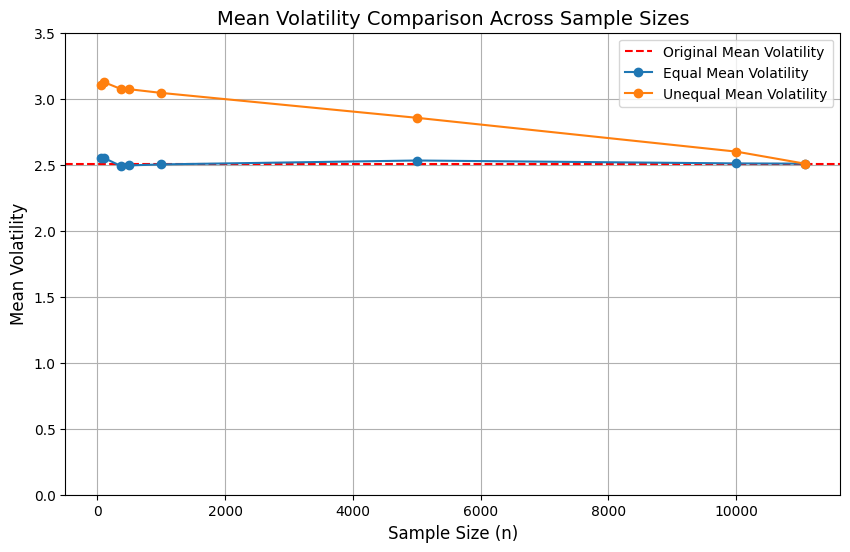

In [57]:
# Data from the comparison table

# Plot the comparison
plt.figure(figsize=(10, 6))

# Add Original Mean Volatility as a horizontal line
plt.axhline(y=original_volatility_mean, color='r', linestyle='--', label='Original Mean Volatility')

# Plot Equal Mean Volatility
plt.plot(comparison_table['Sample Size (n)'], comparison_table['Equal Mean Volatility'], marker='o', label='Equal Mean Volatility')

# Plot Unequal Mean Volatility
plt.plot(comparison_table['Sample Size (n)'], comparison_table['Unequal Mean Volatility'], marker='o', label='Unequal Mean Volatility')

# Adjust y-axis to start from 0
plt.ylim(0, 3.5)

# Add labels, title, and legend
plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Mean Volatility', fontsize=12)
plt.title('Mean Volatility Comparison Across Sample Sizes', fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('volatility_comparison_plot_across_sample_sizes.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


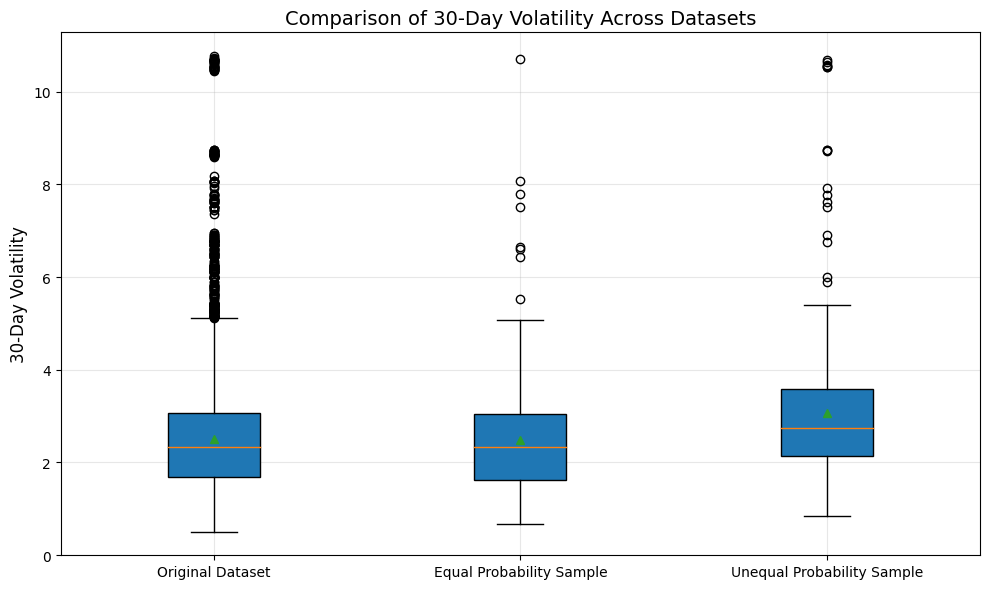

In [58]:
# Prepare the data for box plots
data = [
    cleaned_data_with_metrics['30-Day Volatility'].dropna(),
    equal_probability_sample['30-Day Volatility'].dropna(),
    unequal_probability_sample['30-Day Volatility'].dropna()
]

# Labels for each dataset
labels = ['Original Dataset', 'Equal Probability Sample', 'Unequal Probability Sample']

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True, showmeans=True)

# Add title and labels
plt.title("Comparison of 30-Day Volatility Across Datasets", fontsize=14)
plt.ylabel("30-Day Volatility", fontsize=12)
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig('volatility_boxplot_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


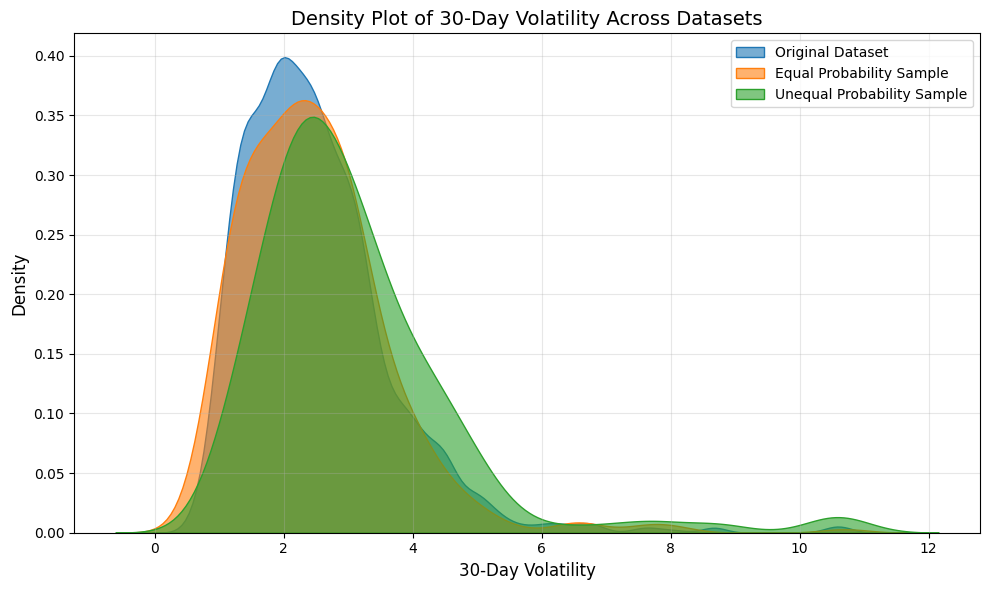

In [59]:
# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(cleaned_data_with_metrics['30-Day Volatility'].dropna(), label='Original Dataset', fill=True, alpha=0.6)
sns.kdeplot(equal_probability_sample['30-Day Volatility'].dropna(), label='Equal Probability Sample', fill=True, alpha=0.6)
sns.kdeplot(unequal_probability_sample['30-Day Volatility'].dropna(), label='Unequal Probability Sample', fill=True, alpha=0.6)

# Add title and labels
plt.title("Density Plot of 30-Day Volatility Across Datasets", fontsize=14)
plt.xlabel("30-Day Volatility", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig('volatility_density_plot_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


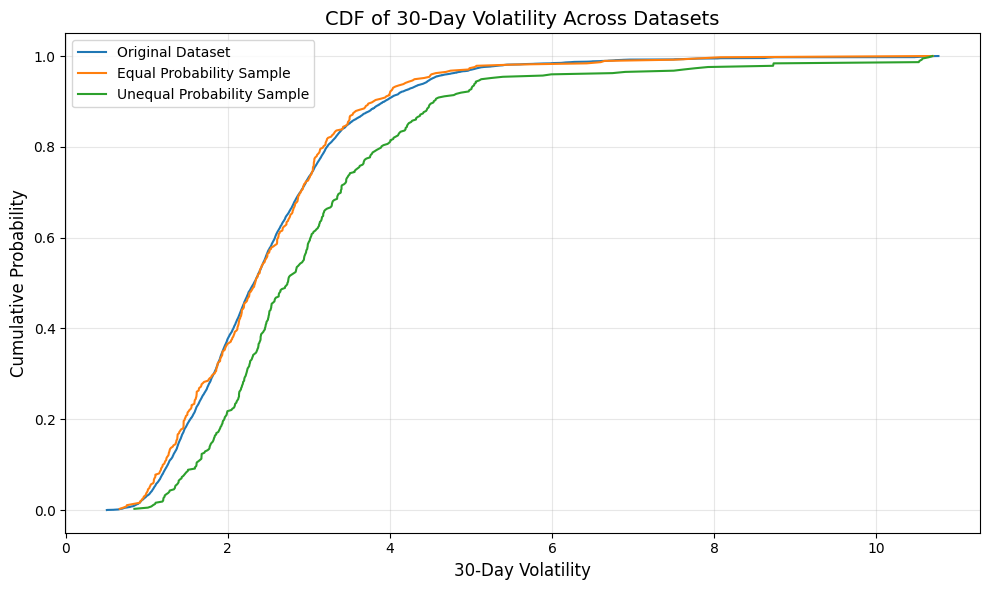

In [60]:
# Compute CDFs for each dataset
plt.figure(figsize=(10, 6))

for label, data in [
    ('Original Dataset', cleaned_data_with_metrics['30-Day Volatility'].dropna()),
    ('Equal Probability Sample', equal_probability_sample['30-Day Volatility'].dropna()),
    ('Unequal Probability Sample', unequal_probability_sample['30-Day Volatility'].dropna())
]:
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

# Add title and labels
plt.title("CDF of 30-Day Volatility Across Datasets", fontsize=14)
plt.xlabel("30-Day Volatility", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Save the plot as a PNG file
plt.savefig('volatility_cdf_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()
